In [1]:
import random
import gensim
import warnings
import statistics
import matplotlib.pyplot as plt
import pandas as pd
import numpy
from gensim.models import word2vec
from nltk.tokenize import word_tokenize
from pprint import pprint
from pymorphy2 import MorphAnalyzer
from collections import Counter
%matplotlib inline
warnings.filterwarnings('ignore')
morph = MorphAnalyzer()

# Only-rhyme vector model

### Different windows

In [42]:
model_rhyme_2 = gensim.models.KeyedVectors.load_word2vec_format('model_stihi.rurhymesWIN2.bin', binary=True)
model_rhyme_5 = gensim.models.KeyedVectors.load_word2vec_format('model_stihi.rurhymesWIN5.bin', binary=True)
model_rhyme_7 = gensim.models.KeyedVectors.load_word2vec_format('model_stihi.rurhymesWIN7.bin', binary=True)

#### A table with first examples

In [85]:
cols = {}

In [86]:
top_words = model_rhyme_2.wv.index2entity[:10]
cols['Слово'] = top_words
res2 = []
for i in top_words:
    tops = []
    for t, n in model_rhyme_2.wv.most_similar(i, topn=3):
        tops.append(t)
    res2.append(', '.join(tops))
cols['Окно 2'] = res2

res5 = []
for i in top_words:
    tops = []
    for t, n in model_rhyme_5.wv.most_similar(i, topn=3):
        tops.append(t)
    res5.append(', '.join(tops))
cols['Окно 5'] = res5

res7 = []
for i in top_words:
    tops = []
    for t, n in model_rhyme_7.wv.most_similar(i, topn=3):
        tops.append(t)
    res7.append(', '.join(tops))
cols['Окно 7'] = res7

In [87]:
titles = ['Слово', 'Окно 2', 'Окно 5', 'Окно 7']
df = pd.DataFrame(cols)
df = df.reindex(columns=titles)
df

,Слово,Окно 2,Окно 5,Окно 7
0,я,"ты, мой, себя","ты, мой, себя","ты, мой, себя"
1,ты,"себя, стобой, я","себя, я, мечта","себя, я, твой"
2,любовь,"нелюбовь, любвь, пошливый","нелюбовь, вновь, твой","нелюбовь, вновь, ты"
3,быть,"пробыть, побыть, пребыть","забывать, побыть, полюбить","забывать, любить, побыть"
4,душа,"феопомп, соблеть, каннель","душить, глушить, безушить","колхозания, смутьяа, Ritt"
5,любить,"полюбить, разлюблять, нелюбить","полюбить, разлюблять, дарить","полюбить, разлюблять, дарить"
6,свет,"рассвет, секрет, просвет","рассвет, секрет, запрет","рассвет, секрет, ответ"
7,глаз,"паз, прозапас, шахраз","час, раз, сейчас","час, раз, сейчас"
8,год,"вред, след, беда","беда, след, нет","беда, нет, след"
9,сон,"полусон, тон, шовковi","полусон, тишина, тон","тишина, полусон, луна"


#### % of similarity between models

In [44]:
%%time
vocab = model_rhyme_2.wv.index2entity[:1000]
intersectw2w5 = 0
for word in vocab:
    w2 = []
    for t, n in model_rhyme_2.wv.most_similar(word, topn=3):
        w2.append(t)
    w5 = []
    for t, n in model_rhyme_5.wv.most_similar(word, topn=3):
        w5.append(t)
    if len(set(w2) & set(w5)) >= 2:
        intersectw2w5 +=1
print('Из первых %d слов окно 2 и окно 5 пересекаются:' % (len(vocab)), intersectw2w5 / len(vocab) * 100, '%')

Из первых 1000 слов окно 2 и окно 5 пересекаются: 65.8 %
Wall time: 2min 36s


In [129]:
intersectw5w7 = 0
for word in vocab:
    w5 = []
    for t, n in model_rhyme_5.wv.most_similar(word, topn=3):
        w5.append(t)
    w7 = []
    for t, n in model_rhyme_7.wv.most_similar(word, topn=3):
        w7.append(t)
    if len(set(w5) & set(w7)) >= 2:
        intersectw5w7 +=1
print('Из первых %d слов окно 5 и окно 7 пересекаются:' % (len(vocab)), intersectw5w7 / len(vocab) * 100, '%')

Из первых 1000 слов окно 5 и окно 7 пересекаются: 95.1 %


In [130]:
intersectw2w7 = 0
for word in vocab:
    w2 = []
    for t, n in model_rhyme_2.wv.most_similar(word, topn=3):
        w2.append(t)
    w7 = []
    for t, n in model_rhyme_7.wv.most_similar(word, topn=3):
        w7.append(t)
    if len(set(w2) & set(w7)) >= 2:
        intersectw2w7 +=1
print('Из первых %d слов окно 2 и окно 7 пересекаются:' % (len(vocab)), intersectw2w7 / len(vocab) * 100, '%')

Из первых 1000 слов окно 2 и окно 7 пересекаются: 59.8 %


#### Choosing words for coherense test

In [175]:
sample =  model_rhyme_2.wv.index2entity[50:10050:500]
for s in sample:
    sim = model_rhyme_2.wv.most_similar(s, topn=2)
    index = model_rhyme_2.wv.vocab[s].index
    pool = model_rhyme_2.wv.index2entity[index-50:index+50]
    intruder = pool[random.randint(0, len(pool))]
    print(s, sim[0][0], sim[1][0], intruder)

лицо налицо очевидец рука
сильный непосильный бессильный старый
игрушка безделушка времюшки прекрасно
хлам бедлам срам ладошка
понемногу немного немногу наивный
упускать отпускать пропускать перец
ненароком наскоком жестоко посидеть
верх наверх вверх выносить
сопеть храпеть скрипеть молодость
воспринимать принимать усложнять отчасти
прибегать побежать убегать достаток
часок разок чуток ни
иностранец голодранец оборванец повестись
ваниль гриль марметиль сестричка
обрывать срывать завывать клевета
заплутать плутать пропадать опережать
троллейбус автобус кондуктор начертать
ряса лясы лоботряс оскорбление
каркас прикраса окрас манто
немецкий простецкий шведский оглашать


In [174]:
sample =  model_rhyme_5.wv.index2entity[50:10050:500]
for s in sample:
    sim = model_rhyme_5.wv.most_similar(s, topn=2)
    index = model_rhyme_5.wv.vocab[s].index
    pool = model_rhyme_5.wv.index2entity[index-50:index+50]
    intruder = pool[random.randint(0, len(pool))]
    print(s, sim[0][0], sim[1][0], intruder)

лицо ресница вереница всегда
сильный бессильный всесильный смело
игрушка подушка маркусик видать
хлам бедлам пополам пример
понемногу немного тревога заплатить
упускать отпускать пропускать украшать
ненароком наскоком жестоко разврат
верх вверх наверх прекращать
сопеть храпеть скрипеть распускать
воспринимать принимать осознавать сокрыть
прибегать побежать подбегать конек
часок разок адресок прибавлять
иностранец африканец голодранец околица
ваниль марметиль кадриль шелуха
обрывать срывать задевать лиза
заплутать плутать уставать леска
троллейбус тролейбус Venseremos намокать
ряса разозляся лясы мурлыкать
каркас раскрас окрас представляться
немецкий простецкий турецкий обличать


#### Average line length

In [24]:
%%time
lens = []
with open('stihi.ru_rhyme_corpus.txt', encoding='UTF-8') as f:
    for line in f:
        words = word_tokenize(line) 
        lens.append(len(words))
print(statistics.mean(lens))

2.9961698332706694
Wall time: 56min 33s


### Rhymes of the same part of speech through the corpus

In [39]:
top_words = model_rhyme_5.wv.index2entity[:100000:10]
print(len(top_words))

10000


In [40]:
parts = numpy.array_split(numpy.array(top_words), 20)

In [41]:
x = []
y = []
for p, i in enumerate(parts):
    x.append(p+1)
for part in parts:
    same_pos = 0
    for w in part:
        top = model_rhyme_5.wv.most_similar(w, topn=10)
        sim_pos = 0
        pos_tag = morph.parse(w)[0].tag.POS
        for t, n in top:
            if pos_tag == morph.parse(t)[0].tag.POS:
                sim_pos += 1
        if sim_pos == 10:
            same_pos += 1
    y.append(same_pos / len(part) * 100)

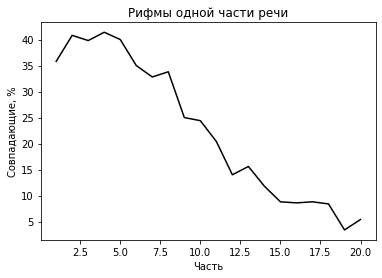

In [42]:
plt.plot(x, y, color='black')
plt.title('Рифмы одной части речи')
plt.ylabel('Совпадающие, %')
plt.xlabel('Часть')
plt.show()

#### Rhymes of the same part of speech: every 1000th word

In [51]:
def make_autopct(values):
       def my_autopct(pct):
           total = sum(values)
           val = int(round(pct*total/100.0))
           return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
       return my_autopct

In [45]:
border={
    'edgecolor':'0',
    'linewidth': 1,
    'linestyle': 'solid'}
white = {'white', 'white'}

In [47]:
pos = {}
top_words = model_stihi_rhyme.wv.index2entity[:100000:1000]
for w in top_words:
    top = model_rhyme_5.wv.most_similar(w, topn=10)
    sim_pos = 0
    for t, n in top:
        if morph.parse(w)[0].tag.POS == morph.parse(t)[0].tag.POS:
            sim_pos += 1
            pos[w] = sim_pos/len(top)
same_pos_rhymes = []
for key, value in pos.items():
    if 1.0 == value:
        same_pos_rhymes.append(key)

In [ ]:
stat = {}
for word in same_pos_rhymes:
    pos = morph.parse(word)[0].tag.POS
    if pos == None:
        print(word)
    if pos not in stat:
        stat[pos] = 0
    stat[pos] += 1

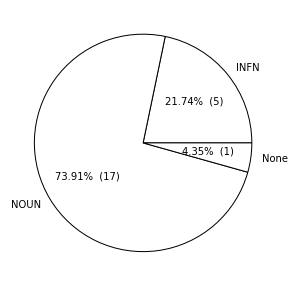

In [52]:
poses = []
for i in list(stat.keys()):
    poses.append(str(i))
number = list(stat.values())
plt.figure(figsize=(5,5))
plt.pie(number, labels=poses, autopct=make_autopct(number), colors=white, wedgeprops=border)
plt.show()

#### Rhymes of the same part of speech: top-100 frequent words

In [ ]:
pos = {}
top_words = model_stihi_rhyme.wv.index2entity[:100]
for w in top_words:
    top = model_stihi_rhyme.wv.most_similar(w, topn=10)
    sim_pos = 0
    for t, n in top:
        if morph.parse(w)[0].tag.POS == morph.parse(t)[0].tag.POS:
            sim_pos += 1
            pos[w] = sim_pos/len(top)
same_pos_rhymes = []
for key, value in pos.items():
    if 1.0 == value:
        same_pos_rhymes.append(key)

In [ ]:
stat = {}
for word in same_pos_rhymes:
    pos = morph.parse(word)[0].tag.POS
    if pos not in stat:
        stat[pos] = 0
    stat[pos] += 1

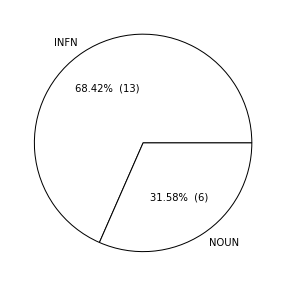

In [55]:
poses = []
for i in list(stat.keys()):
    poses.append(str(i))
number = list(stat.values())
plt.figure(figsize=(5,5))
plt.pie(number, labels=poses, autopct=make_autopct(number), colors=white, wedgeprops=border)
plt.show()

# Tagged corpus vector models

In [4]:
model_base_rh = gensim.models.KeyedVectors.load_word2vec_format('model_stihi.ruRHYMEDWIN5.bin', binary=True)
model_base_rh2 = gensim.models.KeyedVectors.load_word2vec_format('model_stihi.ruRHYMEDWIN2.bin', binary=True)
model_base_rh8 = gensim.models.KeyedVectors.load_word2vec_format('model_stihi.ruRHYMEDWIN8.bin', binary=True)
model_base_rh15 = gensim.models.KeyedVectors.load_word2vec_format('model_stihi.ruRHYMEDWIN15.bin', binary=True)

In [102]:
len(model_base_rh.wv.index2entity)

22535

In [105]:
tagged = 0
for token in model_base_rh.wv.index2entity:
    if '/RHYME' in token:
        tagged += 1
tagged

9297

In [106]:
len(model_base_rh.wv.index2entity) - tagged

13238

### Different windows

In [7]:
def check(word):
    result = morph.parse(word)
    first = result[0]
    if first.tag.POS == 'PREP' \
            or first.tag.POS == 'CONJ' \
            or first.tag.POS == 'PRCL':
        return False
    else:
        return True

In [73]:
print(check('я'))

True


#### A table with first examples

In [5]:
cols_rhymed = {}

In [8]:
top_words = []
for word in model_base_rh.wv.index2entity[:50]:
    if check(word) == True:
        top_words.append(word)
    if len(top_words) == 10:
        break
cols_rhymed['Слово'] = top_words
res2 = []
for i in top_words:
    tops = []
    for t, n in model_base_rh2.wv.most_similar(i, topn=3):
        tops.append(t)
    res2.append(', '.join(tops))
cols_rhymed['Окно 2'] = res2

res5 = []
for i in top_words:
    tops = []
    for t, n in model_base_rh.wv.most_similar(i, topn=3):
        tops.append(t)
    res5.append(', '.join(tops))
cols_rhymed['Окно 5'] = res5

res8 = []
for i in top_words:
    tops = []
    for t, n in model_base_rh8.wv.most_similar(i, topn=3):
        tops.append(t)
    res8.append(', '.join(tops))
cols_rhymed['Окно 8'] = res8

res15 = []
for i in top_words:
    tops = []
    for t, n in model_base_rh15.wv.most_similar(i, topn=3):
        tops.append(t)
    res15.append(', '.join(tops))
cols_rhymed['Окно 15'] = res15

In [9]:
titles = ['Слово', 'Окно 2', 'Окно 5', 'Окно 8', 'Окно 15']
df_rhymed = pd.DataFrame(cols_rhymed)
df_rhymed = df_rhymed.reindex(columns=titles)
df_rhymed

,Слово,Окно 2,Окно 5,Окно 8,Окно 15
0,я,"ты, он, я/RHYME","ты, я/RHYME, хотеть","ты, я/RHYME, хотеть","ты, я/RHYME, ты/RHYME"
1,ты,"она, он, вы","я, ты/RHYME, она","я, ты/RHYME, хотеть","я, ты/RHYME, хотеть"
2,быть,"быть/RHYME, оказываться, становиться","быть/RHYME, оказываться, становиться","быть/RHYME, оказываться, жить","быть/RHYME, всегда, ведь"
3,мы,"они, мы/RHYME, он","мы/RHYME, они, порознь","мы/RHYME, порознь, они","мы/RHYME, порознь, вместе"
4,все,"все/RHYME, многое, так","все/RHYME, весь, многое","все/RHYME, весь, так","весь, все/RHYME, так"
5,он,"она, они, ты","она, он/RHYME, ты","он/RHYME, она, бедняга","он/RHYME, его, бедняга"
6,мой,"твой, мой/RHYME, ваш","твой, мой/RHYME, твой/RHYME","твой, мой/RHYME, твой/RHYME","твой, мой/RHYME, твой/RHYME"
7,весь,"весь/RHYME, все, многий","весь/RHYME, все, все/RHYME","весь/RHYME, все, все/RHYME","весь/RHYME, все, все/RHYME"
8,она,"он, они, ты","он, она/RHYME, ты","она/RHYME, он, ее","она/RHYME, ее, он"
9,твой,"ее, его, мой","твой/RHYME, мой, ее","твой/RHYME, мой, нежный","твой/RHYME, мой, нежный"


#### % of intersection

In [80]:
%%time
vocab = model_base_rh2.wv.index2entity[:1000]
intersect = 0
intersect25 = 0
intersect58 = 0
intersect815 = 0
for word in vocab:
    w2 = []
    for t, n in model_base_rh2.wv.most_similar(word, topn=3):
        w2.append(t)
    w5 = []
    for t, n in model_base_rh.wv.most_similar(word, topn=3):
        w5.append(t)
    w8 = []
    for t, n in model_base_rh8.wv.most_similar(word, topn=3):
        w8.append(t)
    w15 = []
    for t, n in model_base_rh15.wv.most_similar(word, topn=3):
        w15.append(t)
    if len(set(w2) & set(w5) & set(w8) & set(w15)) >= 2:
        intersect +=1
    if len(set(w2) & set(w5)) >= 2:
        intersect25 +=1
    if len(set(w5) & set(w8)) >= 2:
        intersect58 +=1
    if len(set(w8) & set(w15)) >= 2:
        intersect815 +=1
print('Из первых %d слов у всех окон пересекаются:' % (len(vocab)), intersect / len(vocab) * 100, '%')
print('Из первых %d слов у окон 2 и 5 пересекаются:' % (len(vocab)), intersect25 / len(vocab) * 100, '%')
print('Из первых %d слов у окон 5 и 8 пересекаются:' % (len(vocab)), intersect58 / len(vocab) * 100, '%')
print('Из первых %d слов у окон 8 и 15 пересекаются:' % (len(vocab)), intersect815 / len(vocab) * 100, '%')

Из первых 1000 слов у всех окон пересекаются: 60.199999999999996 %
Из первых 1000 слов у окон 2 и 5 пересекаются: 90.7 %
Из первых 1000 слов у окон 5 и 8 пересекаются: 97.8 %
Из первых 1000 слов у окон 8 и 15 пересекаются: 95.39999999999999 %
Wall time: 11.8 s


#### Effect of rhyme through the corpus

In [81]:
slice_tagged = model_base_rh2.wv.index2entity
len(slice_tagged)

22535

In [82]:
parts = numpy.array_split(numpy.array(slice_tagged), 20)

In [84]:
print('В каждой части по %d слов' % len(parts[1]))

В каждой части по 1127 слов


In [87]:
x = []
y2 = []
for p, i in enumerate(parts):
    x.append(p+1)
for part in parts:
    same = []
    for t in part:
        for w, n in model_base_rh2.wv.most_similar(t, topn=1):
            if t+'/RHYME' == w:
                same.append(t)
    y2.append(len(same) / len(part) * 100)

In [88]:
y5 = []
for part in parts:
    same = []
    for t in part:
        for w, n in model_base_rh.wv.most_similar(t, topn=1):
            if t+'/RHYME' == w:
                same.append(t)
    y5.append(len(same) / len(part) * 100)

In [89]:
y8 = []
for part in parts:
    same = []
    for t in part:
        for w, n in model_base_rh8.wv.most_similar(t, topn=1):
            if t+'/RHYME' == w:
                same.append(t)
    y8.append(len(same) / len(part) * 100)

In [90]:
y15 = []
for part in parts:
    same = []
    for t in part:
        for w, n in model_base_rh15.wv.most_similar(t, topn=1):
            if t+'/RHYME' == w:
                same.append(t)
    y15.append(len(same) / len(part) * 100)

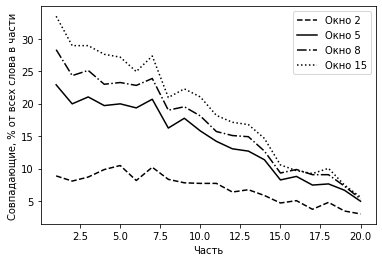

In [92]:
plt.plot(x, y2, label='Окно 2', linestyle='dashed', color='black')
plt.plot(x, y5, label='Окно 5', linestyle='solid', color='black')
plt.plot(x, y8, label='Окно 8', linestyle='dashdot', color='black')
plt.plot(x, y15, label='Окно 15', linestyle='dotted', color='black')
plt.ylabel('Совпадающие, % от всех слова в части')
plt.xlabel('Часть')
plt.legend()
plt.show()

#### Effect of rhyme on top-100 frequent words

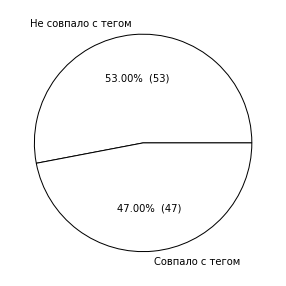

In [86]:
same = []
for t in slice_tagged[:100]:
    for w, n in model_base_rh15.wv.most_similar(t, topn=1):
        if t+'/RHYME' == w:
            same.append(t)
X = [len(slice_tagged[:100])-len(same), len(same)]
Y = ['Не совпало с тегом', 'Совпало с тегом']
plt.figure(figsize=(5,5))
plt.pie(X, labels=Y, autopct=make_autopct(X), colors=white, wedgeprops=border)
plt.show()

#### Effect of semantics through the corpus

In [93]:
corp = model_base_rh.wv.index2entity
parts = numpy.array_split(numpy.array(corp), 20)

In [94]:
x = []
y2 = []
for p, i in enumerate(parts):
    x.append(p+1)
for part in parts:
    s = 0
    for word in part:
        if '/RHYME' in word:
            c = 0
            for i, w in enumerate(model_base_rh2.wv.most_similar(word, topn=3)):
                if '/RHYME' in w[0]:
                    c += 1
            if c == 3:
                s += 1
    y2.append(s / len(part) * 100)

In [95]:
y5 = []
for part in parts:
    s = 0
    for word in part:
        if '/RHYME' in word:
            c = 0
            for i, w in enumerate(model_base_rh.wv.most_similar(word, topn=3)):
                if '/RHYME' in w[0]:
                    c += 1
            if c == 3:
                s += 1
    y5.append(s / len(part) * 100)

In [96]:
y8 = []
for part in parts:
    s = 0
    for word in part:
        if '/RHYME' in word:
            c = 0
            for i, w in enumerate(model_base_rh8.wv.most_similar(word, topn=3)):
                if '/RHYME' in w[0]:
                    c += 1
            if c == 3:
                s += 1
    y8.append(s / len(part) * 100)

In [97]:
y15 = []
for part in parts:
    s = 0
    for word in part:
        if '/RHYME' in word:
            r = 
            c = 0
            for i, w in enumerate(model_base_rh15.wv.most_similar(word, topn=3)):
                if '/RHYME' in w[0]:
                    c += 1
            if c == 3:
                s += 1
    y15.append(s / len(part) * 100)

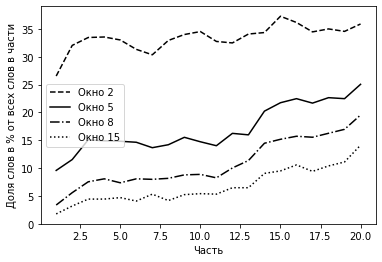

In [99]:
plt.plot(x, y2, label='Окно 2', linestyle='dashed', color='black')
plt.plot(x, y5, label='Окно 5', linestyle='solid', color='black')
plt.plot(x, y8, label='Окно 8', linestyle='dashdot', color='black')
plt.plot(x, y15, label='Окно 15', linestyle='dotted', color='black')
plt.ylabel('Доля слов в % от всех слов в части')
plt.xlabel('Часть')
plt.legend()
plt.show()

### Vocabulary of the models

#### Comparison of top frequent words of different corpora

In [71]:
model_stihi_base = gensim.models.KeyedVectors.load_word2vec_format('model_stihi.ruWIN5.bin', binary=True)
model_base_rh = gensim.models.KeyedVectors.load_word2vec_format('model_stihi.ruRHYMEDWIN5.bin', binary=True)
model_poetic = gensim.models.KeyedVectors.load_word2vec_format('poetic_ruscorp.bin', binary=True)
model_prose = gensim.models.KeyedVectors.load_word2vec_format('model_prose.bin', binary=True)

In [74]:
top_base = []
for w in model_stihi_base.wv.index2entity[:150]:
    if check(w) == True:
        top_base.append(w)
    if len(top_base) == 100:
        break
top_tagged = []
for w in model_base_rh.wv.index2entity[:150]:
    if check(w) == True:
        top_tagged.append(w)
    if len(top_tagged) == 100:
        break
top_poetic = []
for w in model_poetic.wv.index2entity[:150]:
    if check(w) == True:
        top_poetic.append(w)
    if len(top_poetic) == 100:
        break
top_prose = []
for w in model_prose.wv.index2entity[:150]:
    if check(w) == True:
        top_prose.append(w)
    if len(top_prose) == 100:
        break


In [75]:
print(top_base, '\n\n', top_tagged, '\n\n', top_poetic, '\n\n', top_prose)

['я', 'ты', 'быть', 'мы', 'все', 'он', 'мой', 'весь', 'она', 'твой', 'свой', 'жизнь', 'любовь', 'душа', 'они', 'этот', 'тот', 'сердце', 'себя', 'нет', 'знать', 'кто', 'вы', 'любить', 'один', 'день', 'где', 'мочь', 'глаз', 'становиться', 'мир', 'жить', 'небо', 'хотеть', 'ночь', 'свет', 'слово', 'рука', 'наш', 'друг', 'год', 'давать', 'человек', 'уже', 'там', 'уходить', 'сон', 'такой', 'сказать', 'забывать', 'время', 'ждать', 'идти', 'понимать', 'ветер', 'счастие', 'каждый', 'земля', 'судьба', 'снова', 'другой', 'оставаться', 'бог', 'солнце', 'видеть', 'теперь', 'сам', 'боль', 'здесь', 'много', 'путь', 'вновь', 'мысль', 'всегда', 'слеза', 'который', 'говорить', 'звезда', 'смотреть', 'мечта', 'пора', 'окно', 'прощать', 'сила', 'находить', 'дождь', 'надо', 'верить', 'дорога', 'вдруг', 'опять', 'белый', 'раз', 'новый', 'взгляд', 'утро', 'дом', 'уж', 'огонь', 'стих'] 

 ['я', 'ты', 'быть', 'мы', 'все', 'он', 'мой', 'весь', 'она', 'твой', 'свой', 'они', 'этот', 'жизнь', 'тот', 'кто', 'душа', 

#### Sampling words that are present inside and outside of the 'rhyme zone'

In [107]:
top_tagged = model_base_rh.wv.index2entity[::400]

In [108]:
print(len(top_tagged))

57


In [28]:
def get_sim(model, word, top):
    sim = []
    for w, i in model(word, topn=top):
        sim.append(w)
    return sim

In [35]:
rows = []
for word in top_tagged:
    if '/RHYME' in word:
        try:
            no_tag = word.strip('/RHYME')
            tag_sim = get_sim(model_base_rh.wv.most_similar, word, 3)
            notag_sim = get_sim(model_base_rh.wv.most_similar, no_tag, 3)
            row = {'Слово': no_tag,
                   'С тегом': ', '.join(tag_sim),
                   'Без тега': ', '.join(notag_sim)}
            rows.append(row)
        except:
            pass

First ten examples:

In [39]:
df_tag = pd.DataFrame(rows)
titles = ['Слово', 'Без тега', 'С тегом']
df_tag = df_tag.reindex(columns=titles)
df_tag.to_csv('compareRHYME.csv', encoding='utf-8')
df_tag.head(10)

,Слово,Без тега,С тегом
0,посмотреть,"взглядывать, поглядеть, смотреть","поглядеть/RHYME, взглядывать/RHYME, смотреть/R..."
1,будто,"буда, будто/RHYME, словно","будто, прежде/RHYME, обычно/RHYME"
2,тополь,"клен, береза, липа","береза/RHYME, клен/RHYME, тополь"
3,топор,"топор/RHYME, меч, сабля","топор, меч/RHYME, сабля/RHYME"
4,игривый,"озорной, шаловливый, смешливый","шаловливый/RHYME, озорной/RHYME, строптивый/RHYME"
5,напролет,"напролет/RHYME, просиживать, подряд","напролет, подряд/RHYME, бессонный/RHYME"
6,отвергать,"отринуть, пренебрегать, презирать","отринуть/RHYME, презирать/RHYME, пренебрегать/..."
7,ребеночек,"детишки, ребенок, деточка","детишки/RHYME, ребенок/RHYME, сынишка/RHYME"
8,крупица,"крупинка, крупица/RHYME, кроха","крупица, кроха/RHYME, частица/RHYME"
9,переплет,"переплет/RHYME, вязь, переплетение","переплет, вязь/RHYME, свиток/RHYME"


# 'Base' corpus vector model

#### Different windows: % of intersection

In [110]:
model_stihi_base = gensim.models.KeyedVectors.load_word2vec_format('model_stihi.ruWIN5.bin', binary=True)
model_base2 = gensim.models.KeyedVectors.load_word2vec_format('model_stihi.ruWIN2.bin', binary=True)
model_base8 = gensim.models.KeyedVectors.load_word2vec_format('model_stihi.ruWIN8.bin', binary=True)
model_base15 = gensim.models.KeyedVectors.load_word2vec_format('model_stihi.ruWIN15.bin', binary=True)

In [112]:
%%time
vocab = model_base2.wv.index2entity[:1000]
intersect = 0
intersect25 = 0
intersect58 = 0
intersect815 = 0
for word in vocab:
    w2 = []
    for t, n in model_base2.wv.most_similar(word, topn=3):
        w2.append(t)
    w5 = []
    for t, n in model_stihi_base.wv.most_similar(word, topn=3):
        w5.append(t)
    w8 = []
    for t, n in model_base8.wv.most_similar(word, topn=3):
        w8.append(t)
    w15 = []
    for t, n in model_base15.wv.most_similar(word, topn=3):
        w15.append(t)
    if len(set(w2) & set(w5) & set(w8) & set(w15)) >= 2: 
        intersect +=1
    if len(set(w2) & set(w5)) >= 2:
        intersect25 +=1
    if len(set(w5) & set(w8)) >= 2:
        intersect58 +=1
        intersect815 +=1
print('Из первых %d слов у всех окон пересекаются:' % (len(vocab)), intersect / len(vocab) * 100, '%')
print('Из первых %d слов у окон 2 и 5 пересекаются:' % (len(vocab)), intersect25 / len(vocab) * 100, '%')
print('Из первых %d слов у окон 5 и 8 пересекаются:' % (len(vocab)), intersect58 / len(vocab) * 100, '%')
print('Из первых %d слов у окон 8 и 15 пересекаются:' % (len(vocab)), intersect815 / len(vocab) * 100, '%')

Из первых 1000 слов у всех окон пересекаются: 98.5 %
Из первых 1000 слов у окон 2 и 5 пересекаются: 99.7 %
Из первых 1000 слов у окон 5 и 8 пересекаются: 99.8 %
Из первых 1000 слов у окон 8 и 15 пересекаются: 99.8 %
Wall time: 7.05 s
